#      STOCK-MARKET ANALYSIS 

<center><img alt="Insight logo" src="https://www.financialexpress.com/wp-content/uploads/2021/09/SPDR-S_P-500-ETF-5-things-to-know-before-investing.jpg?w=1024" align="center" hspace="10px" vspace="10px" width="900" height="1100" ></center>


* HERE WE ARE ANALYZING THE STOCK PRICES FOR MNC'S SUCH AS : 
* AMAZON  ,  MICROSOFT  ,  GOOGLE  ,  APPLE .
* HERE WE HAVE A DATA FRAME FROM KAGGLE https://www.kaggle.com/datasets/darshanprabhu09/stock-prices-for
* WE ARE GOING TO CALCULATE INTRA DAY PROFITS AND SOME TRENDS.
* We will explore this dataset with Python Numpy/Pandas and visualize the results using Matplotlib/Seaborn/Plotly.
* THIS ANALYSIS WOULD HELP FOR TRADER AND SOME INVESTORS TO LOOK INTO THE HISTORY OF AMAZON, APPLE, GOOGLE, MICROSOFT STOCKS.

**To load the dataset into a Pandas dataframe, we first need to import the necessary libraries:**

In [1]:
!pip install jovian opendatasets --upgrade --quiet
import pandas as pd #IMPORTING PANDAS

In [2]:
# URL FOR THE DATASET
dataset_url = 'https://www.kaggle.com/datasets/darshanprabhu09/stock-prices-for' 

In [3]:
apple_path = '/kaggle/input/stock-prices-for/AAPL_data.csv'     #DECLARING DIRECTORY 
amazon_path = '/kaggle/input/stock-prices-for/AMZN_data.csv'   #DECLARING DIRECTORY
google_path = '/kaggle/input/stock-prices-for/GOOG_data.csv'  #DECLARING DIRECTORY
microsoft = '/kaggle/input/stock-prices-for/MSFT_data.csv'   #DECLARING DIRECTORY

In [4]:
# downloading the data file
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./stock-prices-for" (use force=True to force download)


In [5]:
# DIRECTORY FOR THE DATASET
data_dir = './stock-prices-for'

In [6]:
import os
os.listdir(data_dir)

['AAPL_data.csv', 'AMZN_data.csv', 'GOOG_data.csv', 'MSFT_data.csv']

In [7]:
#CREATING A LIST FOR CSV FILES

company_list=['AAPL_data.csv', 'AMZN_data.csv', 'GOOG_data.csv', 'MSFT_data.csv'] 

In [8]:
#HERE WE ARE MERGING ALL DATA IN A SINGLE CSV FILE

all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(data_dir+"/"+file)
    all_data = pd.concat([all_data, current_df]) 

In [9]:
# DECLARING PROJECT NAME
project_name = "stock-market-analysis"

## Data Preparation and Cleaning :

**Here we are Loading the dataset into a data frame using Pandas and Exploring the number of rows & columns, ranges of values etc.**
#### Here we need to Handle missing, incorrect and invalid data.



In [13]:
import numpy as np     # linear algebra
import pandas as pd    # data processing

# data visualization

import matplotlib.pyplot as plt 
import seaborn as sns
import jovian

In [14]:
all_data #HERE WE ARE DISPLAYING ALL THE FOUR DATAS INTO ONE DATASET

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT
1255,2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT
1256,2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT
1257,2018-02-06,86.8900,91.4750,85.2500,91.3300,67998564,MSFT


In [15]:
all_data.shape

(4752, 7)

In [16]:
# HERE WE DELARED SEPARATE VARIABLES FOR EACH DATA SETS

sp_amazon=pd.read_csv(data_dir+"/AMZN_data.csv")
sp_apple=pd.read_csv(data_dir+"/AAPL_data.csv")
sp_mcrf=pd.read_csv(data_dir+'/MSFT_data.csv')
sp_google=pd.read_csv(data_dir+'/GOOG_data.csv')

In [17]:
sp_amazon

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN
...,...,...,...,...,...,...,...
1254,2018-02-01,1445.00,1459.88,1385.140,1390.00,9113808,AMZN
1255,2018-02-02,1477.39,1498.00,1414.000,1429.95,11125722,AMZN
1256,2018-02-05,1402.62,1458.98,1320.720,1390.00,11494985,AMZN
1257,2018-02-06,1361.46,1443.99,1351.790,1442.84,11066819,AMZN


 HERE WE ARE ADDING TWO NEW COLUMNS NAMELY :
   * **UP TREND**
   * **DOWN TREND**
   * **INTRA DAY PROFIT** 
   
TO CHECK THE TREND AND PROFIT FOR EVERY DAY.

In [18]:
sp_amazon['Intra day profit']= sp_amazon.close - sp_amazon.open
sp_apple['Intra day profit']= sp_apple.close - sp_apple.open
sp_google['Intra day profit']= sp_google.close - sp_google.open
sp_mcrf['Intra day profit']= sp_mcrf.close- sp_mcrf.open

In [19]:
# TRENDS ARE ONLY APPROXIMATE VALUE
# THIS IS STOCK MARKET,WE ARE NOT SURE ABOUT TRENDS UNLESS THEY PROVIDE THE GRAPH IN THE GIVEN DATA
value = (sp_amazon.open < sp_amazon.close) # COMPARING THE VALUES FOR UP TREND
sp_amazon['TREND']=''
i=0
while (len(sp_amazon)-1) >= i :
    if value[i] == True : # CHECKS WHETHER UP TREND OR NOT
        sp_amazon['TREND'][i]='UP TREND'
        i= i + 1
    else :
        i= i + 1
        
value2 = (sp_amazon.open > sp_amazon.close) # COMPARING THE VALUES FOR DOWN TREND
k=0
while (len(sp_amazon)-1) >= k :
    if value2[k] == True : # CHECKS WHETHER DOWN TREND OR NOT
        sp_amazon['TREND'][k]='DOWN TREND'
        k= k + 1
    else :
        k= k + 1
        
value3 = (sp_amazon.open == sp_amazon.close) # COMPARING THE VALUE FOR SIDE WISE EXPANSION
v=0
while (len(sp_amazon)-1) >= v :
    if value3[v] == True : # CHECKS WHETHER SIDE WISE OR NOT
        sp_amazon['TREND'][v]='SIDE WISE'
        v= v + 1
    else :
        v= v + 1
sp_amazon






/tmp/ipykernel_146/3556405131.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_amazon['TREND'][i]='UP TREND'
/tmp/ipykernel_146/3556405131.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_amazon['TREND'][k]='DOWN TREND'
/tmp/ipykernel_146/3556405131.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_amazon['TREND'][v]='SIDE WISE'


,date,open,high,low,close,volume,Name,Intra day profit,TREND
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.55,UP TREND
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-5.99,DOWN TREND
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.49,DOWN TREND
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,7.94,UP TREND
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,1.87,UP TREND
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,1445.00,1459.88,1385.140,1390.00,9113808,AMZN,-55.00,DOWN TREND
1255,2018-02-02,1477.39,1498.00,1414.000,1429.95,11125722,AMZN,-47.44,DOWN TREND
1256,2018-02-05,1402.62,1458.98,1320.720,1390.00,11494985,AMZN,-12.62,DOWN TREND
1257,2018-02-06,1361.46,1443.99,1351.790,1442.84,11066819,AMZN,81.38,UP TREND


In [20]:
# TRENDS ARE ONLY APPROXIMATE VALUE
# THIS IS STOCK MARKET,WE ARE NOT SURE ABOUT TRENDS UNLESS THEY PROVIDE THE GRAPH IN THE GIVEN DATA
value = (sp_apple.open < sp_apple.close) # COMPARING THE VALUES FOR UP TREND
sp_apple['TREND']=''
i=0
while (len(sp_apple)-1)>= i :
    if value[i] == True : # CHECKS WHETHER UP TREND OR NOT
        sp_apple['TREND'][i]='UP TREND'
        i= i + 1
    else :
        i= i + 1
        
value2 = (sp_apple.open > sp_apple.close) # COMPARING THE VALUES FOR DOWN TREND
k=0
while (len(sp_apple)-1) >= k :
    if value2[k] == True :# CHECKS WHETHER DOWN TREND OR NOT
        sp_apple['TREND'][k]='DOWN TREND'
        k= k + 1
    else :
        k= k + 1
        
value3 = (sp_apple.open == sp_apple.close) # COMPARING THE VALUE FOR SIDE WISE EXPANSION
v=0
while (len(sp_apple)-1) >= v :
    if value3[v] == True : # CHECKS WHETHER SIDE WISE OR NOT
        sp_apple['TREND'][v]='SIDE WISE'
        v= v + 1
    else :
        v= v + 1
sp_apple
                      

/tmp/ipykernel_146/3293690585.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_apple['TREND'][i]='UP TREND'
/tmp/ipykernel_146/3293690585.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_apple['TREND'][k]='DOWN TREND'
/tmp/ipykernel_146/3293690585.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_apple['TREND'][v]='SIDE WISE'


,date,open,high,low,close,volume,Name,Intra day profit,TREND
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,UP TREND
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,UP TREND
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,DOWN TREND
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,DOWN TREND
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,UP TREND
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.6150,UP TREND
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-5.5000,DOWN TREND
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-2.6100,DOWN TREND
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,8.2000,UP TREND


In [21]:
# TRENDS ARE ONLY APPROXIMATE VALUE
# THIS IS STOCK MARKET,WE ARE NOT SURE ABOUT TRENDS UNLESS THEY PROVIDE THE GRAPH IN THE GIVEN DATA
value = (sp_google.open < sp_google.close) # COMPARING THE VALUES FOR UP TREND
sp_google['TREND']=''
i=0
while (len(sp_google)-1) >= i :
    if value[i] == True : # CHECKS WHETHER UP TREND OR NOT
        sp_google['TREND'][i]='UP TREND'
        i= i + 1
    else :
        i= i + 1
        
value2 = (sp_google.open > sp_google.close) # COMPARING THE VALUES FOR DOWN TREND
k=0
while (len(sp_google)-1) >= k :
    if value2[k] == True :# CHECKS WHETHER DOWN TREND OR NOT
        sp_google['TREND'][k]='DOWN TREND'
        k= k + 1
    else :
        k= k + 1
        
value3 = (sp_google.open == sp_google.close) # COMPARING THE VALUE FOR SIDE WISE EXPANSION
v=0
while (len(sp_google)-1) >= v :
    if value3[v] == True : # CHECKS WHETHER SIDE WISE OR NOT
        sp_google['TREND'][v]='SIDE WISE'
        v= v + 1
    else :
        v= v + 1
sp_google

/tmp/ipykernel_146/2854750493.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_google['TREND'][i]='UP TREND'
/tmp/ipykernel_146/2854750493.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_google['TREND'][k]='DOWN TREND'


,date,open,high,low,close,volume,Name,Intra day profit,TREND
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG,-9.540,DOWN TREND
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG,-1.210,DOWN TREND
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG,-9.920,DOWN TREND
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG,8.450,UP TREND
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG,1.894,UP TREND
...,...,...,...,...,...,...,...,...,...
970,2018-02-01,1162.610,1174.00,1157.52,1167.70,2412114,GOOG,5.090,UP TREND
971,2018-02-02,1122.000,1123.07,1107.28,1111.90,4857943,GOOG,-10.100,DOWN TREND
972,2018-02-05,1090.600,1110.00,1052.03,1055.80,3798301,GOOG,-34.800,DOWN TREND
973,2018-02-06,1027.180,1081.71,1023.14,1080.60,3447956,GOOG,53.420,UP TREND


In [22]:
# TRENDS ARE ONLY APPROXIMATE VALUE
# THIS IS STOCK MARKET,WE ARE NOT SURE ABOUT TRENDS UNLESS THEY PROVIDE THE GRAPH IN THE GIVEN DATA
value = (sp_mcrf.open < sp_mcrf.close) # COMPARING THE VALUES FOR UP TREND
sp_mcrf['TREND']=''
i=0
while (len(sp_mcrf)-1) >= i :
    if value[i] == True : # CHECKS WHETHER UP TREND OR NOT
        sp_mcrf['TREND'][i]='UP TREND'
        i= i + 1
    else :
        i= i + 1
        
value2 = (sp_mcrf.open > sp_mcrf.close) # COMPARING THE VALUES FOR DOWN TREND
k=0
while (len(sp_mcrf)-1) >= k :
    if value2[k] == True :# CHECKS WHETHER DOWN TREND OR NOT
        sp_mcrf['TREND'][k]='DOWN TREND'
        k= k + 1
    else :
        k= k + 1
        
value3 = (sp_mcrf.open == sp_mcrf.close) # COMPARING THE VALUE FOR SIDE WISE EXPANSION
v=0
while (len(sp_mcrf)-1) >= v :
    if value3[v] == True : # CHECKS WHETHER SIDE WISE OR NOT
        sp_mcrf['TREND'][v]='SIDE WISE'
        v= v + 1
    else :
        v= v + 1
sp_mcrf

/tmp/ipykernel_146/1517831954.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_mcrf['TREND'][i]='UP TREND'
/tmp/ipykernel_146/1517831954.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_mcrf['TREND'][k]='DOWN TREND'
/tmp/ipykernel_146/1517831954.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_mcrf['TREND'][v]='SIDE WISE'


,date,open,high,low,close,volume,Name,Intra day profit,TREND
0,2013-02-08,27.35,27.710,27.3100,27.55,33318306,MSFT,0.20,UP TREND
1,2013-02-11,27.65,27.920,27.5000,27.86,32247549,MSFT,0.21,UP TREND
2,2013-02-12,27.88,28.000,27.7500,27.88,35990829,MSFT,0.00,SIDE WISE
3,2013-02-13,27.93,28.110,27.8800,28.03,41715530,MSFT,0.10,UP TREND
4,2013-02-14,27.92,28.060,27.8700,28.04,32663174,MSFT,0.12,UP TREND
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,-0.53,DOWN TREND
1255,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,-1.86,DOWN TREND
1256,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,-2.56,DOWN TREND
1257,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,4.44,UP TREND


In [23]:
# HERE WE ARE FINDING THE MISSING VALUES
is_any_missing_value_amazon=sp_amazon.isna().sum()
is_any_missing_value_google=sp_google.isna().sum()
is_any_missing_value_microsoft=sp_mcrf.isna().sum()
is_any_missing_value_apple=sp_apple.isna().sum()

In [24]:
# HERE WE ARE CHECKING FOR ANY NULL VALUE (OR) ANY MISSING VALUES INSIDE OUR DATASET
is_any_missing_value_amazon

date                0
open                0
high                0
low                 0
close               0
volume              0
Name                0
Intra day profit    0
TREND               0
dtype: int64

In [25]:
is_any_missing_value_apple

date                0
open                0
high                0
low                 0
close               0
volume              0
Name                0
Intra day profit    0
TREND               0
dtype: int64

In [26]:
is_any_missing_value_google

date                0
open                0
high                0
low                 0
close               0
volume              0
Name                0
Intra day profit    0
TREND               0
dtype: int64

In [27]:
is_any_missing_value_microsoft

date                0
open                0
high                0
low                 0
close               0
volume              0
Name                0
Intra day profit    0
TREND               0
dtype: int64

 HERE WE ARE LOOKING INTO THE DATASET BY USING THE .describe() FUNCTION TO KNOW ABOUT THE 
* HIGH
* MEAN
* LOW
* AND SOME OTHER STATICAL VALUES

In [28]:
des_of_amz = sp_amazon.describe()
des_of_amz

,open,high,low,close,volume,Intra day profit
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,576.867264,582.017221,571.113517,576.880041,3.730465e+06,0.012777
std,282.500019,284.417123,280.215237,282.500395,2.166506e+06,8.311859
min,248.940000,252.930000,245.750000,248.230000,1.092970e+06,-55.000000
25%,325.870000,329.485000,322.185000,325.800000,2.511165e+06,-3.615000
50%,506.000000,512.330000,495.640000,503.820000,3.144719e+06,-0.010000
75%,777.620000,781.845000,770.720000,777.420000,4.220246e+06,4.080000
max,1477.390000,1498.000000,1450.040000,1450.890000,2.385606e+07,81.380000


In [29]:
des_of_apple=sp_apple.describe()
des_of_apple

,open,high,low,close,volume,Intra day profit
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07,0.011270
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07,1.283588
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07,-7.370000
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07,-0.686700
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07,0.040000
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07,0.745000
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08,8.250000


In [30]:
des_of_google=sp_google.describe()
des_of_google

,open,high,low,close,volume,Intra day profit
count,975.000000,975.000000,975.000000,975.000000,9.750000e+02,975.000000
mean,725.364168,730.822248,719.456843,725.403353,1.808414e+06,0.039185
std,165.996590,166.847404,165.526487,166.420529,9.479685e+05,7.770445
min,494.650000,495.976000,487.560000,492.550000,7.932000e+03,-43.270000
25%,565.113000,570.380000,559.055000,564.785000,1.261927e+06,-3.920000
50%,722.710000,727.000000,716.430000,720.640000,1.576830e+06,0.160000
75%,822.035000,826.185000,818.725000,823.330000,2.052652e+06,4.645000
max,1177.330000,1186.890000,1171.980000,1175.840000,1.116494e+07,53.420000


In [31]:
des_of_mcrf=sp_mcrf.describe()
des_of_mcrf

,open,high,low,close,volume,Intra day profit
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,51.026394,51.436007,50.630397,51.063081,3.386946e+07,0.036686
std,14.859387,14.930144,14.774630,14.852117,1.958979e+07,0.537886
min,27.350000,27.600000,27.230000,27.370000,7.425603e+06,-3.340000
25%,40.305000,40.637500,39.870000,40.310000,2.254879e+07,-0.240000
50%,47.440000,47.810000,47.005000,47.520000,2.938758e+07,0.030000
75%,59.955000,60.435000,59.275000,59.730000,3.842024e+07,0.330000
max,95.140000,96.070000,93.720000,95.010000,2.483542e+08,4.440000


In [32]:
amzn=pd.read_csv(data_dir+"/AMZN_data.csv")
aapl=pd.read_csv(data_dir+"/AAPL_data.csv")
msft=pd.read_csv(data_dir+'/MSFT_data.csv')
goog=pd.read_csv(data_dir+'/GOOG_data.csv')

# DECLARING NEW VARIABLES TO STORE THE DATA SET
aapl = aapl.values
amzn = amzn.values
goog = goog.values
msft = msft.values

concat = np.vstack((aapl,amzn,goog,msft)) # HERE WE ARE CONCATING THE DATASET
cols = ['date', 'open', 'high', 'low', 'close', 'volume','Name']

dt = pd.DataFrame(concat, columns=cols)

In [33]:
# HERE WE ARE GOING TO CONVERT THE DATES TO YEAR WISE.
sp_amazon['date'] = pd.to_datetime(sp_amazon['date'])
sp_apple['date'] = pd.to_datetime(sp_apple['date'])
sp_google['date'] = pd.to_datetime(sp_google['date'])
sp_mcrf['date'] = pd.to_datetime(sp_mcrf['date'])
sp_amazon

,date,open,high,low,close,volume,Name,Intra day profit,TREND
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.55,UP TREND
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-5.99,DOWN TREND
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.49,DOWN TREND
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,7.94,UP TREND
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,1.87,UP TREND
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,1445.00,1459.88,1385.140,1390.00,9113808,AMZN,-55.00,DOWN TREND
1255,2018-02-02,1477.39,1498.00,1414.000,1429.95,11125722,AMZN,-47.44,DOWN TREND
1256,2018-02-05,1402.62,1458.98,1320.720,1390.00,11494985,AMZN,-12.62,DOWN TREND
1257,2018-02-06,1361.46,1443.99,1351.790,1442.84,11066819,AMZN,81.38,UP TREND


# Exploratory Analysis and Visualization

### HERE WE ARE EXPRESSING OUR ANALYSIS GRAPHICALLY



In [36]:
# IMPORTING LIBRARIES REQUIRED FOR VISUALIZATION.
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14




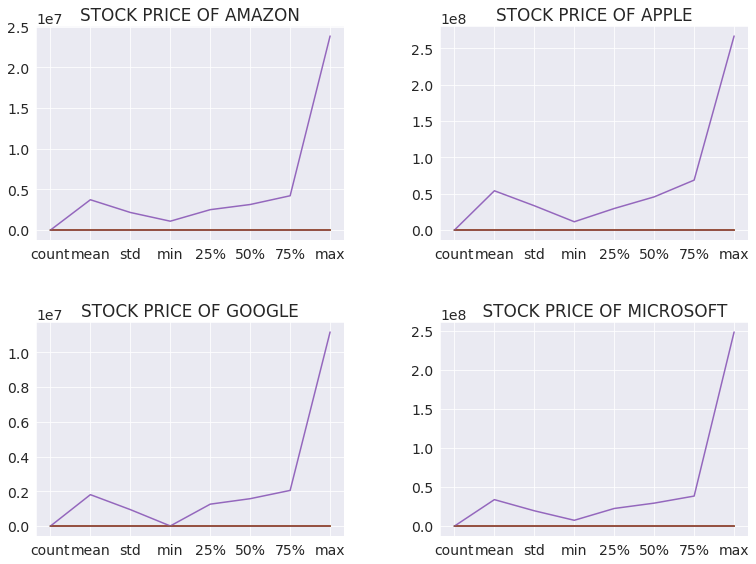

In [37]:
fig, axes = plt.subplots(2,2,figsize=(12,9))
plt.tight_layout(pad=4);
# ploting the stocks:

axes[0,0].plot(des_of_amz)
axes[0,0].set_title('STOCK PRICE OF AMAZON')
axes[0,1].plot(des_of_apple)
axes[0,1].set_title('STOCK PRICE OF APPLE')
axes[1,0].plot(des_of_google)
axes[1,0].set_title('STOCK PRICE OF GOOGLE')
axes[1,1].plot(des_of_mcrf)
axes[1,1].set_title('    STOCK PRICE OF MICROSOFT');

In [38]:
 # HERE WE ARE DEFINING A FUNCTION TO PLOT A DATA IN THREE DIFFERENT GRAPHICAL REPRESENTATION
    
def plots(df, x):
    group = df.groupby('Name') # grouping by name
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
    sns.histplot(df,x=x,hue='Name',kde=True, ax=axes[0]) # ploting histogram
    sns.barplot(x=group[x].mean().index,
               y=group[x].mean(),ax=axes[1]) # ploting bar graph
    
    for container in axes[1].containers:
        axes[1].bar_label(container,size=15,color='black')
        
    axes[2].pie(df['Name'].value_counts(), # ploting pie chart 
               labels=df['Name'].value_counts().index,
               autopct='%0.2f%%')
    
    plt.suptitle("BARPLOT OF {}'s MEAN VALUES AND DATA DISTRIBUTION GROUPED BY NAME".format(x), size=20)
    
    plt.tight_layout()
    plt.show()

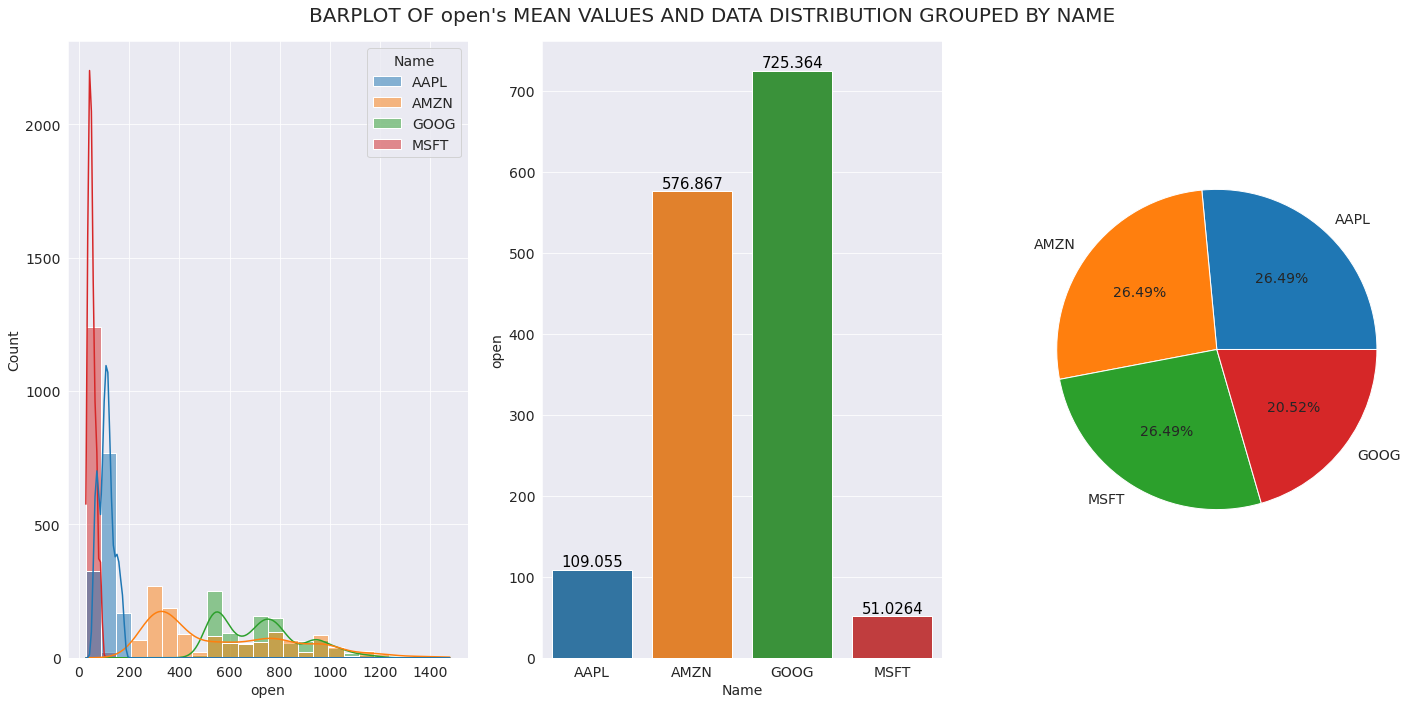

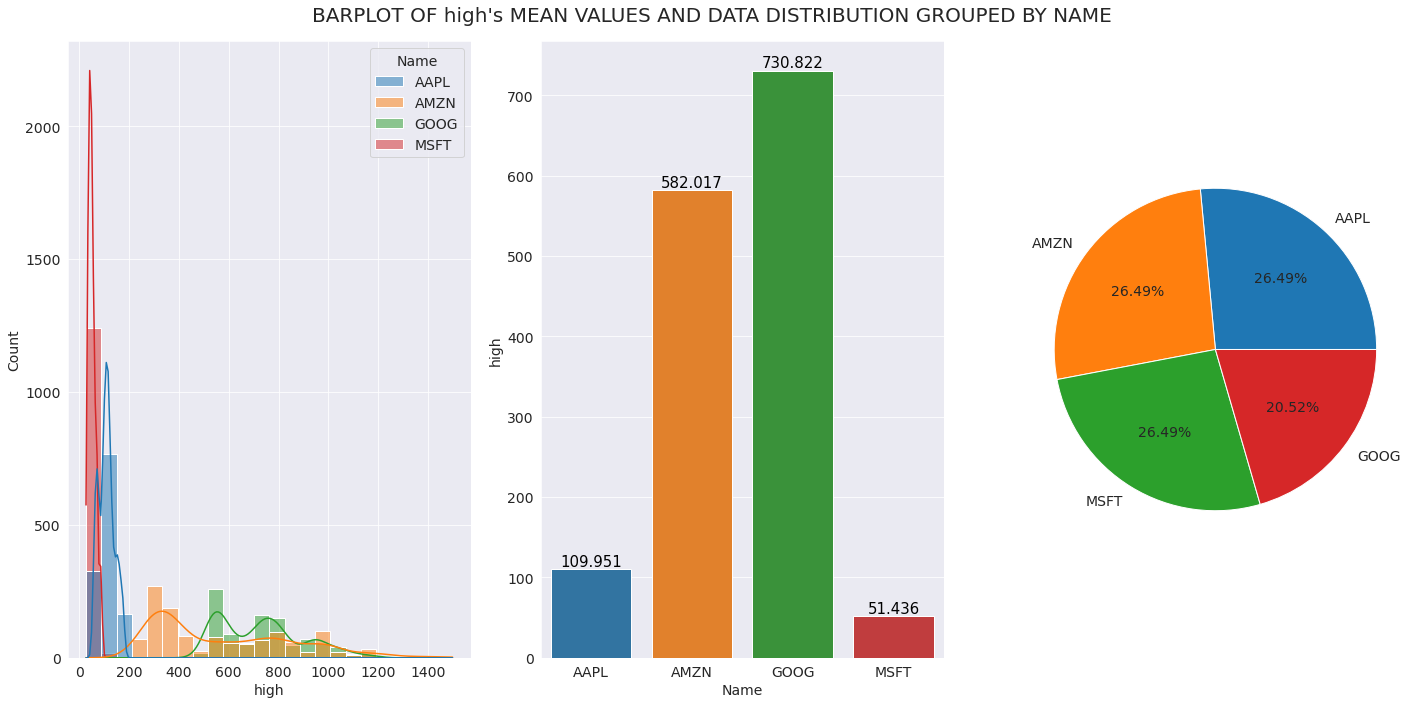

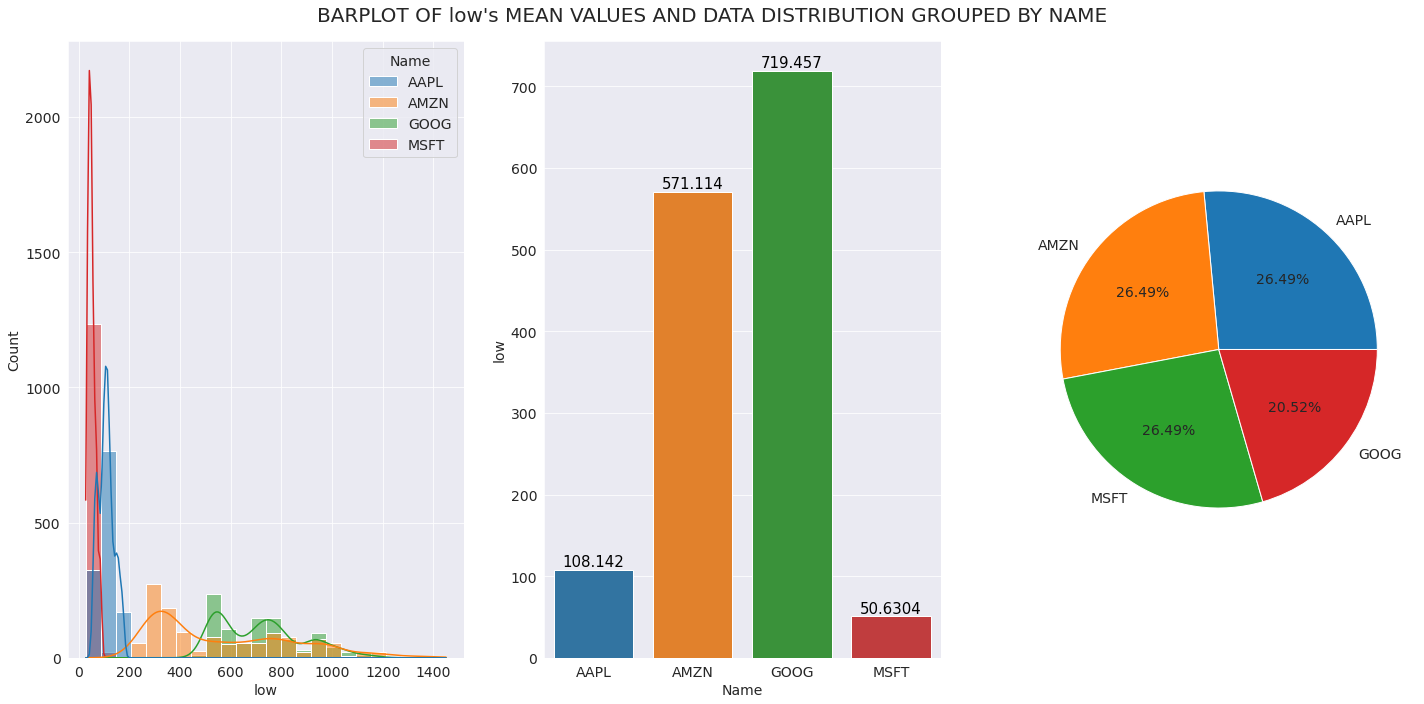

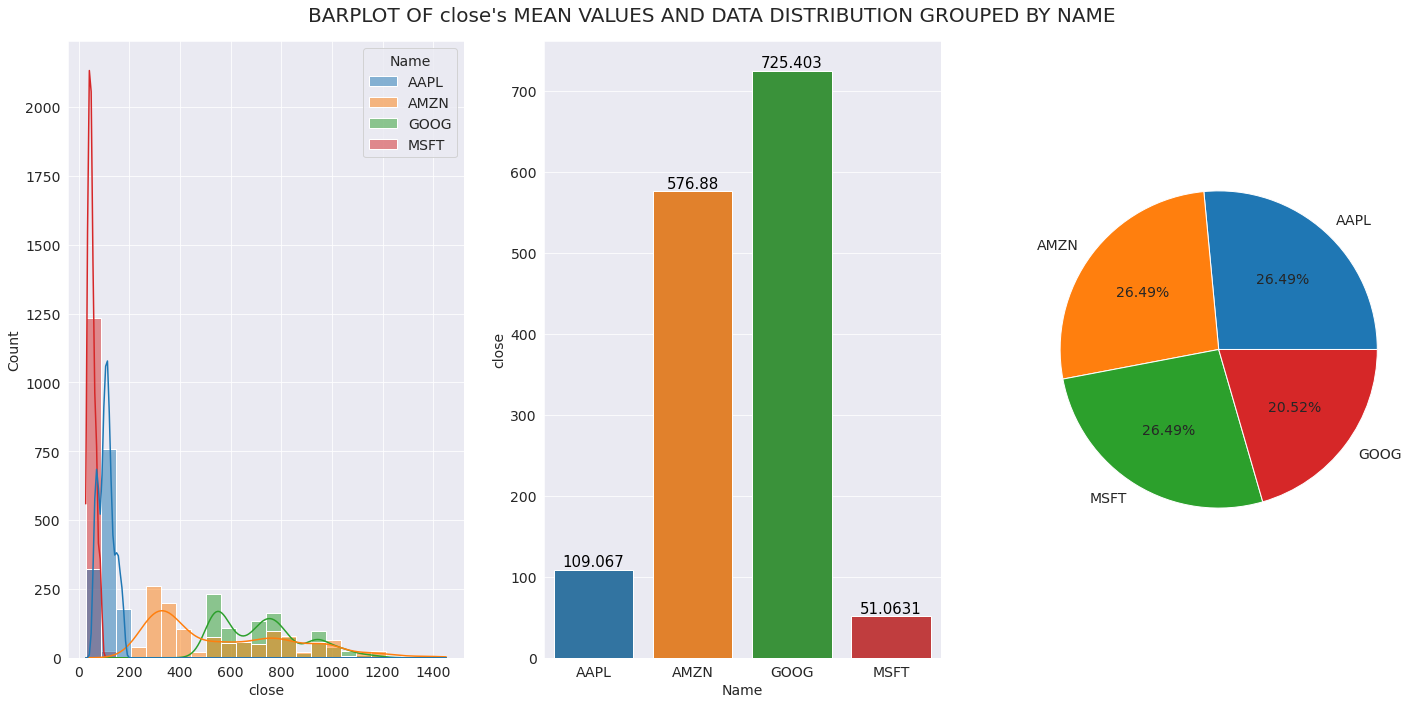

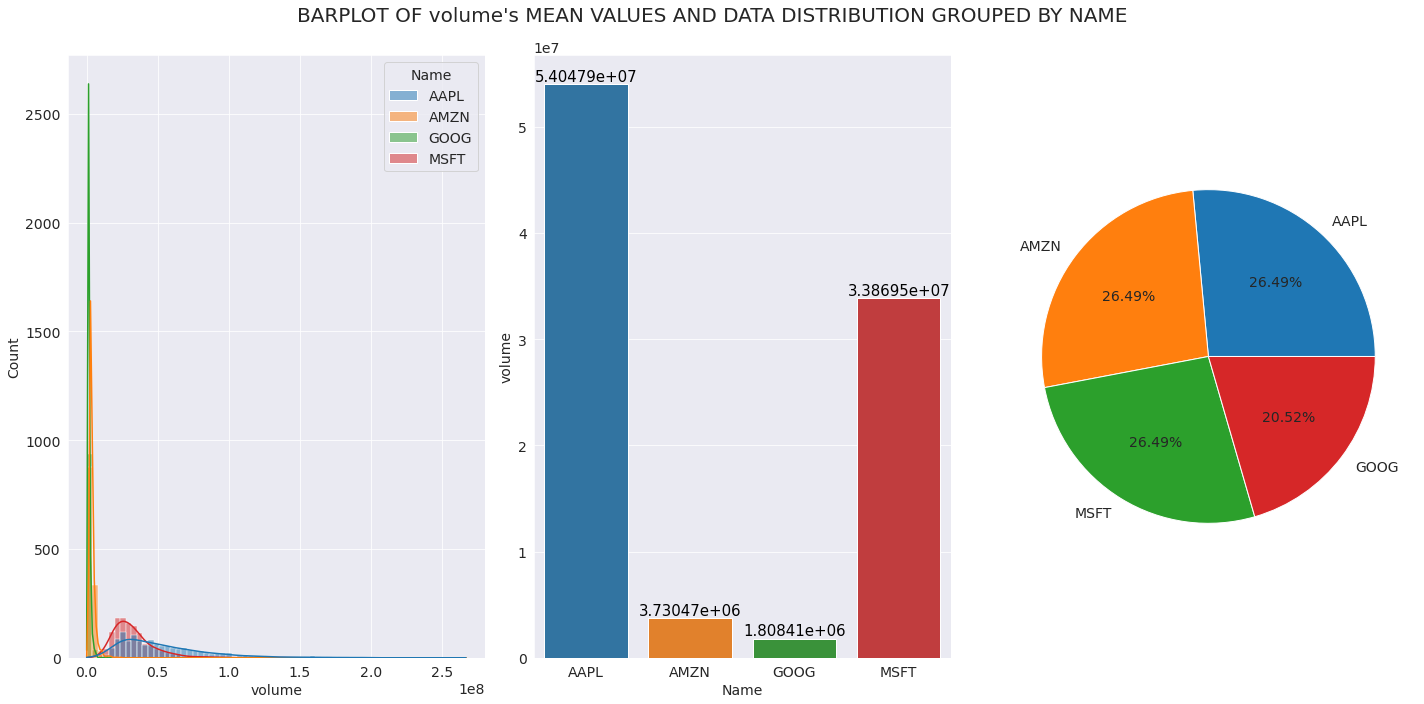

In [39]:
nums = ['open', 'high', 'low', 'close', 'volume'] # HERE WE ARE PROVIDING INPUT FOR THE FUNCTION

for i in nums:
    plots(dt, i)

### INSIGHT FROM THE GRAPH:

#### PLOT 1 :

* IN THE FIRST SPACE WE PLOTTED HISTOGRAM WHICH CONTAIN THE "OPEN PRICE " FOR ALL THE FOUR STOCKS.
* IN SECOND SPACE WE PLOTTED BAR GRAPH WHICH CONTAINS THE MEAN FOR THE " OPEN PRICE " FOR EACH STOCKS .
* AND IN THE THIRD SPACE WE PLOTTED A PIE CHART WHICH CONTAINS THE PERCENTAGE FOR THE MEAN VALUE OF "OPEN PRICE" OF ALL STOCKS.
* PIE CHART PROVES US THAT  THE AMAZON STOCKS , THE MICROSOFT STOCKS AND THE APPLE STOCKS HAS NEARLY THE SAME PERCENTAGE OF COMPOSITION .
* THE BAR GRAPH PROVES US THAT THE MEAN VALUE FOR THE OPEN PRICE IS HIGHER FOR THE STOCKS OF GOOGLE.

#### PLOT 2: 

* IN THE FIRST SPACE WE PLOTTED HISTOGRAM WHICH CONTAIN THE "HIGH PRICE " FOR ALL THE FOUR STOCKS. 
* IN SECOND SPACE WE PLOTTED BAR GRAPH WHICH CONTAINS THE MEAN FOR THE " HIGH PRICE " FOR EACH STOCKS .
* AND IN THE THIRD SPACE WE PLOTTED A PIE CHART WHICH CONTAINS THE PERCENTAGE FOR THE MEAN VALUE OF "HIGH PRICE" OF ALL STOCKS.
* PIE CHART PROVES US THAT  THE AMAZON STOCKS , THE MICROSOFT STOCKS AND THE APPLE STOCKS HAS NEARLY THE SAME PERCENTAGE OF COMPOSITION .
* THE BAR GRAPH PROVES US THAT THE MEAN VALUE FOR THE " HIGH PRICE " IS HIGHER FOR THE STOCKS OF GOOGLE.

#### PLOT 3: 

* IN THE FIRST SPACE WE PLOTTED HISTOGRAM WHICH CONTAIN THE "LOW PRICE " FOR ALL THE FOUR STOCKS. 
* IN SECOND SPACE WE PLOTTED BAR GRAPH WHICH CONTAINS THE MEAN FOR THE " LOW PRICE " FOR EACH STOCKS .
* AND IN THE THIRD SPACE WE PLOTTED A PIE CHART WHICH CONTAINS THE PERCENTAGE FOR THE MEAN VALUE OF "LOW PRICE" OF ALL STOCKS.
* PIE CHART PROVES US THAT  THE AMAZON STOCKS , THE MICROSOFT STOCKS AND THE APPLE STOCKS HAS NEARLY THE SAME PERCENTAGE OF COMPOSITION .
* THE BAR GRAPH PROVES US THAT THE MEAN VALUE FOR THE " LOW PRICE " IS HIGHER FOR THE STOCKS OF GOOGLE.

#### PLOT 4:

* IN THE FIRST SPACE WE PLOTTED HISTOGRAM WHICH CONTAIN THE "CLOSE PRICE " FOR ALL THE FOUR STOCKS. 
* IN SECOND SPACE WE PLOTTED BAR GRAPH WHICH CONTAINS THE MEAN FOR THE " CLOSE PRICE " FOR EACH STOCKS. 
* AND IN THE THIRD SPACE WE PLOTTED A PIE CHART WHICH CONTAINS THE PERCENTAGE FOR THE MEAN VALUE OF "CLOSE PRICE" OF ALL STOCKS.
* PIE CHART PROVES US THAT  THE AMAZON STOCKS , THE MICROSOFT STOCKS AND THE APPLE STOCKS HAS NEARLY THE SAME PERCENTAGE OF COMPOSITION .
* THE BAR GRAPH PROVES US THAT THE MEAN VALUE FOR THE " CLOSE PRICE " IS HIGHER FOR THE STOCKS OF GOOGLE.

#### PLOT 5: 

* IN THE FIRST SPACE WE PLOTTED HISTOGRAM WHICH CONTAIN THE " VOLUME " FOR ALL THE FOUR STOCKS 
* IN SECOND SPACE WE PLOTTED BAR GRAPH WHICH CONTAINS THE MEAN FOR THE " VOLUME " FOR EACH STOCKS 
* AND IN THE THIRD SPACE WE PLOTTED A PIE CHART WHICH CONTAINS THE PERCENTAGE FOR THE MEAN VALUE OF " VOLUME " OF ALL STOCKS
* PIE CHART PROVES US THAT  THE AMAZON STOCKS , THE MICROSOFT STOCKS AND THE APPLE STOCKS HAS NEARLY THE SAME PERCENTAGE OF COMPOSITION .
* THE BAR GRAPH PROVES US THAT THE MEAN VALUE FOR THE "VOLUME " IS HIGHER FOR THE STOCKS OF APPLE.









# GRAPH FOR THE  *HIGHEST PRICE*  AND  *THE LOWEST PRICE*  OF THE STOCKS

**PLOT 1 : HERE THIS LINE CHART COMPARES THE ALL TIME HIGH OF EACH YEARS WITH ALL TIME LOW OF EACH YEARS .**

 AMAZON TIME LINE GRAPH                                      
  [SCALE] -- [YEARLY]

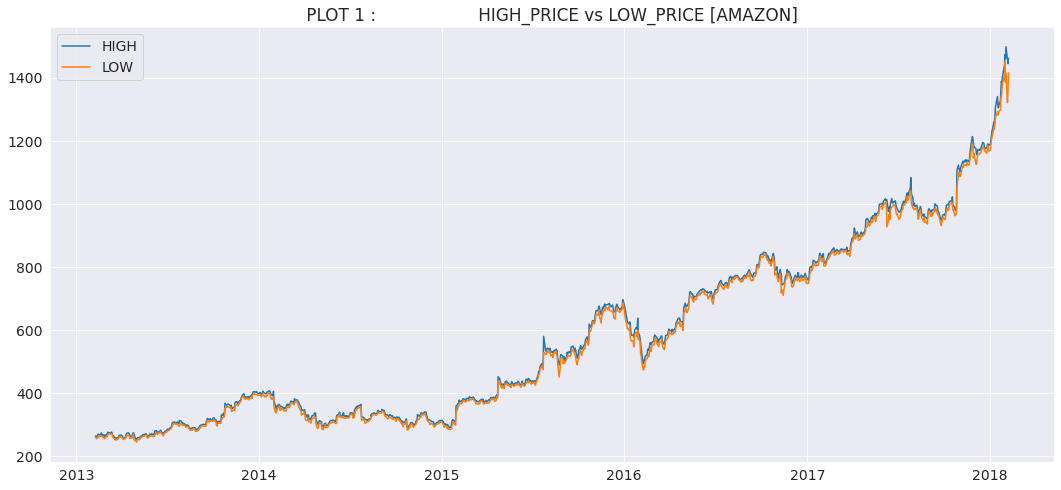

In [40]:
plt.figure(figsize=(18,8))
plt.plot('date',"high",data=sp_amazon)
plt.plot('date',"low",data=sp_amazon)
plt.legend(["HIGH","LOW"])
plt.title(' PLOT 1 :                   HIGH_PRICE vs LOW_PRICE [AMAZON] ');


## GRAPH ANALYSIS:

* FROM **YEAR 2014 - 2015** --> AMAZON STOCK SHOWS A DOWN TREND .

* FROM **YEAR 2015 - 2016** --> AMAZON STOCKS SHOWS A UP TREND .

* IN **EARLY 2016**         --> THE STOCKS SHOWS A FINANCIAL CRISIS BUT IN **LATER 2016** THE STOCKS RETAIN TO HIGH.

* AND IN THE **YEAR 2018**           --> IT REACHES THE ALL TIME HIGH.

THIS GRAPH PROVES US THAT THE STOCK OF AMAZON GROWS YEARLY AND HAS  UPTREND.

 **PLOT 2 : HERE THIS LINE CHART COMPARES THE ALL TIME HIGH OF EACH YEARS WITH ALL TIME LOW OF EACH YEARS .**

 APPLE TIME LINE GRAPH 
 [SCALE] -- [YEARLY]

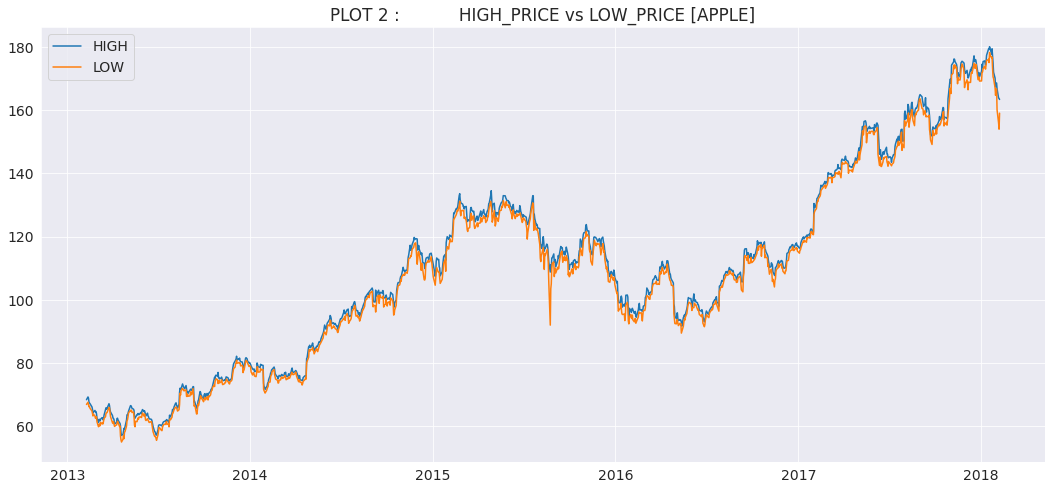

In [41]:
plt.figure(figsize=(18,8))
plt.plot("date",'high',data=sp_apple)
plt.plot("date",'low',data=sp_apple)
plt.legend(["HIGH","LOW"])
plt.title('PLOT 2 :           HIGH_PRICE vs LOW_PRICE [APPLE]');

## GRAPH ANALYSIS :

* FROM **YEAR 2013 - 2014** --> THE GRAPH EXPANDS ONLY SIDE WISE NOT SHOWING A MASSIVE HIGH .
* FROM **YEAR 2014 - 2015** --> THE GRAPH SHOWS A MASSIVE UP TREND .
* IN **MID OF 2015** --> THE STOCKS OF APPLE FACES  A FINANCIAL CRISES , SO THE PRICE FELLS DOWN AND MARK A **DOWN TREND** UPTO **LATE 2015**
* FROM **YEAR 2016 - 2017** --> THE  GRAPH SHOWS A SIDE WISE EXPANSION LIKE SAME AS THE YEAR OF **2013- 2014** . THIS SHOWS US THAT  **"THE HISTORY REPEATS"**.
* FROM **YEAR 2017 - 2018** --> THE GRAPH CLEARLY SHOWS US THE **UP TREND**.



THIS GRAPH PROVES US THAT THE STOCK OF APPLE GROWS YEARLY AND HAS UPTREND.

**PLOT 3 : HERE THIS LINE CHART COMPARES THE ALL TIME HIGH OF EACH YEARS WITH ALL TIME LOW OF EACH YEARS .**

GOOGLE TIME LINE GRAPH
 [SCALE] -- [YEARLY]

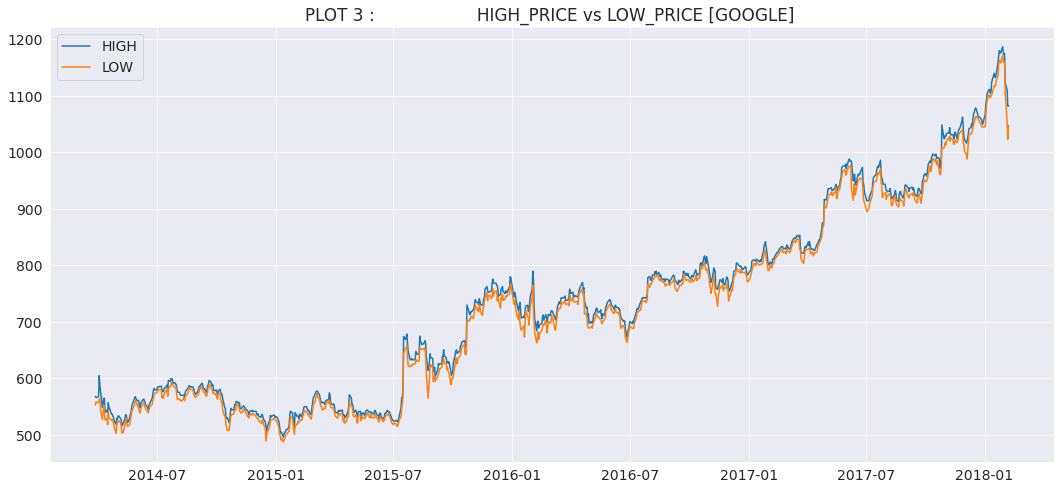

In [42]:
plt.figure(figsize=(18,8))
plt.plot("date",'high',data=sp_google)
plt.plot("date",'low',data=sp_google)
plt.legend(["HIGH","LOW"])
plt.title('PLOT 3 :                   HIGH_PRICE vs LOW_PRICE [GOOGLE] ');

## GRAPH ANALYSIS:


* FROM **YEAR 2014 - 2015** --> THE GRAPH EXPANDS SIDE WISE AND AT **EARLY 2015** IT MARKS A DOWN TREND
* IN THE **MONTH JULY 2015** --> THE STOCK GIVES A MASSIVE HIGH 
* FROM **2016 - 2018** --> THE STOCK STARTS MOVING IN AN **UP TREND** 

THIS GRAPH PROVES US THAT THE STOCK OF GOOGLE GROWS YEARLY AND HAS UPTREND.

 **PLOT 4 : HERE THIS LINE CHART COMPARES THE ALL TIME HIGH OF EACH YEARS WITH ALL TIME LOW OF EACH YEARS .**

MICROSOFT TIME LINE GRAPH
[SCALE] -- [YEARLY]

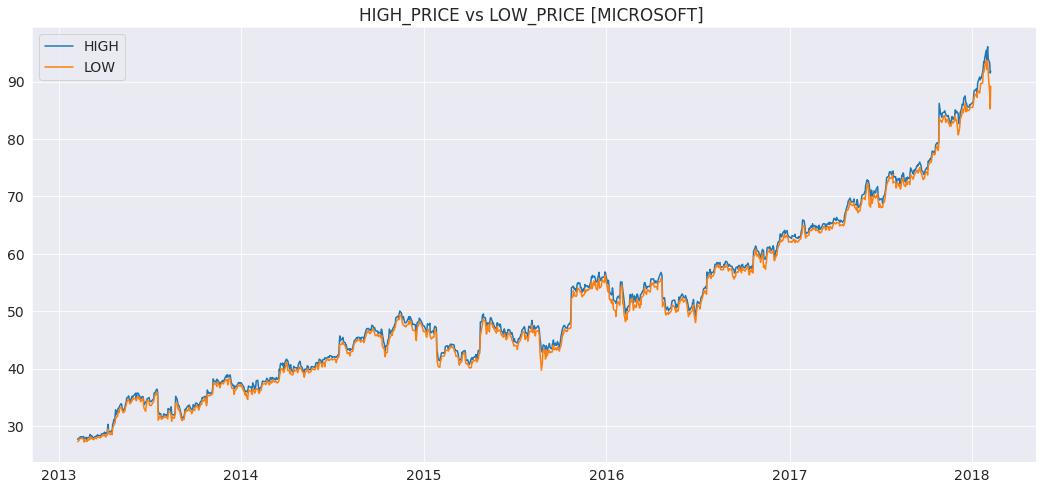

In [43]:
plt.figure(figsize=(18,8))
plt.plot("date",'high',data=sp_mcrf)
plt.plot("date",'low',data=sp_mcrf)
plt.legend(["HIGH","LOW"])
plt.title('HIGH_PRICE vs LOW_PRICE [MICROSOFT] ');


## GRAPH ANALYSIS :

* THIS GRAPH SHOWS US A SLOW RISE IN PRICE 
* MORE OVER THE GRAPHS EXPANDS SIDE WISE 
* FROM THE **YEAR 2015 - 2016** --> STOCKS OF MICROSOFT FACES MANY ECONOMIC CRISES.
* FROM THE **MID OF 2016** --> THE STOCKS OF MICROSOFT SHOW AN **UP TREND** 

THIS GRAPH PROVES US THAT THE STOCK OF MICROSOFT GROWS YEARLY AND HAS UPTREND.

## DISPLAYING HISTOGRAM FOR OPEN PRICE AND CLOSE PRICE

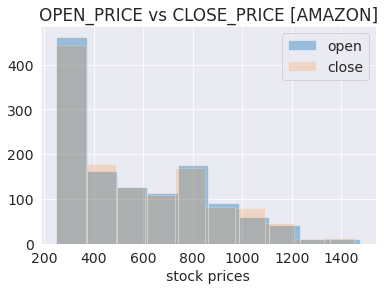

In [44]:
plt.hist('open',data=sp_amazon,alpha=0.4) #HERE WE ARE PLOTTING A HISTOGRAM
plt.hist('close',data=sp_amazon,alpha=0.2)
plt.legend(['open','close']);
plt.title('OPEN_PRICE vs CLOSE_PRICE [AMAZON]')
plt.xlabel('stock prices');

* **IN AMAZON STOCKS IT SHOWS A HUGE DIFFERENCE BETWEEN THE OPEN PRICE AND THE CLOSED PRICE**

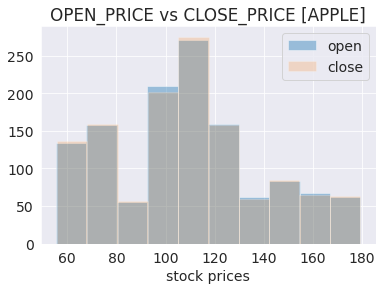

In [45]:
plt.hist('open',data=sp_apple,alpha=0.4)
plt.hist('close',data=sp_apple,alpha=0.2)
plt.legend(['open','close']);
plt.title('OPEN_PRICE vs CLOSE_PRICE [APPLE]')
plt.xlabel('stock prices');

* **IN APPLE STOCK THERE IS NO LARGE DIFFERENCE BETWEEN THE OPEN PRICE AND THE CLOSED PRICE , BUT THERE IS A LITTLE DIFFERENCE.**

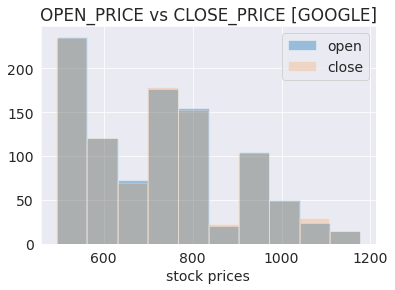

In [46]:
plt.hist('open',data=sp_google,alpha=0.4)
plt.hist('close',data=sp_google,alpha=0.2)
plt.legend(['open','close']);
plt.title('OPEN_PRICE vs CLOSE_PRICE [GOOGLE]')
plt.xlabel('stock prices');

* **IN THE GOOGLE STOCKS THERE IS LITTLE DIFFERENCE BETWEEN THE OPENING PRICE AND THE CLOSING PRICE**


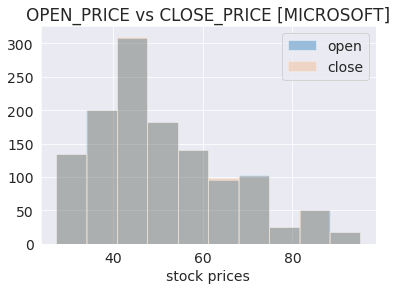

In [47]:
plt.hist('open',data=sp_mcrf,alpha=0.4)
plt.hist('close',data=sp_mcrf,alpha=0.2)
plt.legend(['open','close']);
plt.title('OPEN_PRICE vs CLOSE_PRICE [MICROSOFT]')
plt.xlabel('stock prices');

* **IN THE STOCKS OF MICROSOFT THERE IS LITERALLY NO DIFFERENCE BETWEEN THE OPEN PRICE AND THE CLOSED PRICE.**

# Asking and Answering Questions

* HERE ARE SOME REAL WORLD PROBLEM WHICH WE ARE FACING IN STOCK MARKET



## What Could Be The Average Daily Return For Amazon Stock ?


#### ANALYSIS :

In [50]:
sp_amazon

,date,open,high,low,close,volume,Name,Intra day profit,TREND
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.55,UP TREND
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-5.99,DOWN TREND
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.49,DOWN TREND
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,7.94,UP TREND
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,1.87,UP TREND
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,1445.00,1459.88,1385.140,1390.00,9113808,AMZN,-55.00,DOWN TREND
1255,2018-02-02,1477.39,1498.00,1414.000,1429.95,11125722,AMZN,-47.44,DOWN TREND
1256,2018-02-05,1402.62,1458.98,1320.720,1390.00,11494985,AMZN,-12.62,DOWN TREND
1257,2018-02-06,1361.46,1443.99,1351.790,1442.84,11066819,AMZN,81.38,UP TREND


In [51]:
describe=sp_amazon.describe()
describe

,open,high,low,close,volume,Intra day profit
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,576.867264,582.017221,571.113517,576.880041,3.730465e+06,0.012777
std,282.500019,284.417123,280.215237,282.500395,2.166506e+06,8.311859
min,248.940000,252.930000,245.750000,248.230000,1.092970e+06,-55.000000
25%,325.870000,329.485000,322.185000,325.800000,2.511165e+06,-3.615000
50%,506.000000,512.330000,495.640000,503.820000,3.144719e+06,-0.010000
75%,777.620000,781.845000,770.720000,777.420000,4.220246e+06,4.080000
max,1477.390000,1498.000000,1450.040000,1450.890000,2.385606e+07,81.380000


In [52]:
list=(describe['Intra day profit'].values)# HERE WE ARE STORING INTRADAY PROFIT VALUES ALONE
list[1]

0.012776727561556912

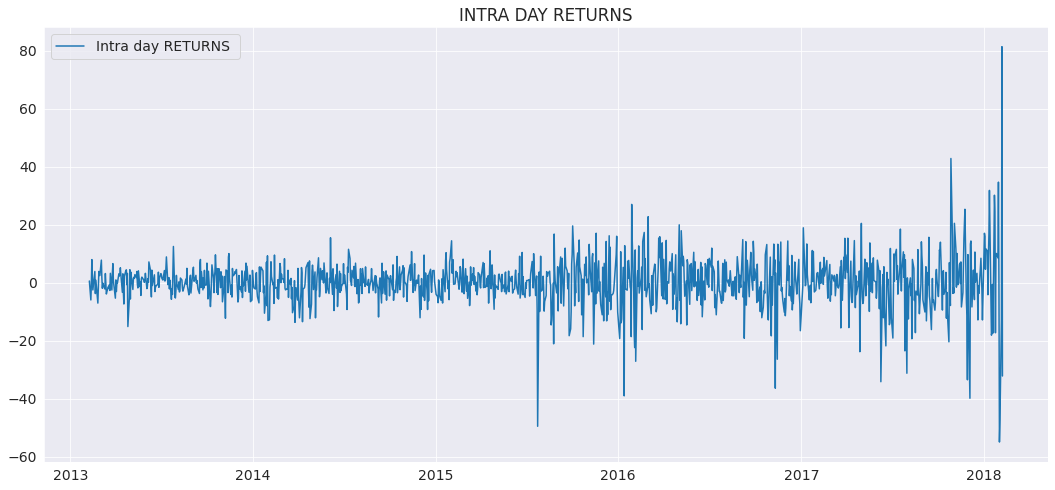

In [53]:
plt.figure(figsize=(18,8))
plt.plot("date",'Intra day profit',data=sp_amazon)
plt.legend(["Intra day RETURNS "])
plt.title('INTRA DAY RETURNS');

### EXPLANATION :

* THE AVERAGE DAILY RETURN FOR AMAZON STOCKS WAS 0.012776727561556912 WHICH IS NEARLY 1% POSITIVE.
* THIS GRAPH SHOWS THE VOLATILITY OF THE INTRA-DAY RETURNS.
* NEARLY WITHIN 5 YEARS THE STOCKS OF AMAZON GROWTH WERE NEARLY 800% HIGH.

### CONCLUSION :
* HERE WE CONCLUDED THAT THE DAILY AVERAGE RETURN IS NEARLY 1% .

## What Could Be The Correct Day For Profit Booking And Getting The Assets Back From Stock Of Microsoft ?

In [54]:
z=sp_mcrf.nlargest(10,['high']) # LISTING OUT TOP 10 HIGH VALUES
z

,date,open,high,low,close,volume,Name,Intra day profit,TREND
1254,2018-02-01,94.790,96.07,93.5813,94.26,47227882,MSFT,-0.530,DOWN TREND
1251,2018-01-29,95.140,95.45,93.7200,93.92,31569940,MSFT,-1.220,DOWN TREND
1253,2018-01-31,93.750,95.40,93.5100,95.01,48756338,MSFT,1.260,UP TREND
1250,2018-01-26,93.120,94.06,92.5800,94.06,29172167,MSFT,0.940,UP TREND
1255,2018-02-02,93.640,93.97,91.5000,91.78,47867753,MSFT,-1.860,DOWN TREND
1252,2018-01-30,93.300,93.66,92.1000,92.74,38635053,MSFT,-0.560,DOWN TREND
1248,2018-01-24,92.550,93.43,91.5800,91.82,33277483,MSFT,-0.730,DOWN TREND
1249,2018-01-25,92.465,93.24,91.9300,92.33,26383238,MSFT,-0.135,DOWN TREND
1256,2018-02-05,90.560,93.24,88.0000,88.00,51031465,MSFT,-2.560,DOWN TREND
1247,2018-01-23,91.900,92.30,91.5400,91.90,23412841,MSFT,0.000,SIDE WISE


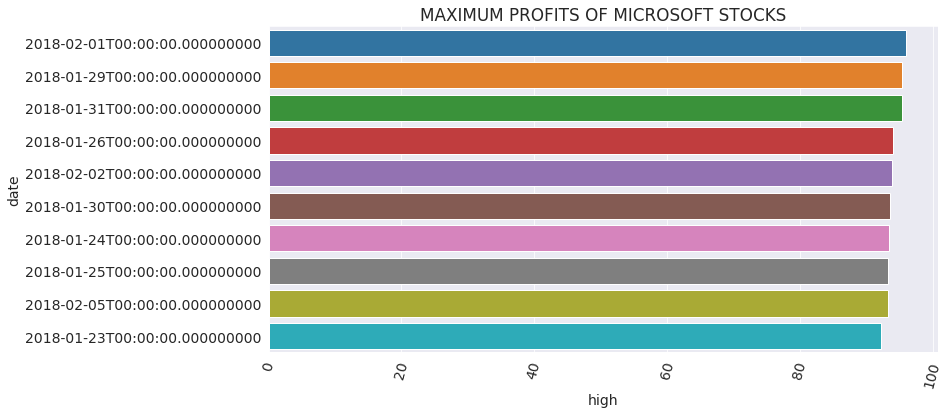

In [55]:
plt.figure(figsize=(12,6))
plt.title('MAXIMUM PROFITS OF MICROSOFT STOCKS')
sns.barplot(x='high',y='date',data=z)
plt.xticks(rotation=75);


In [56]:
print('{} THIS WAS THE CORRECT DATE TO BOOK THEIR PROFIT , BECAUSE THE WAS IN ALL TIMES HIGH .'.format(sp_mcrf['date'][1254]))

2018-02-01 00:00:00 THIS WAS THE CORRECT DATE TO BOOK THEIR PROFIT , BECAUSE THE WAS IN ALL TIMES HIGH .


### GRAPH ANALYSIS:
 * THIS GRAPH IS PLOTTED BETWEEN THE HIGH VALUES AND DATE
 * THIS GRAPH SHOWS US THE DATE AT WHICH THE STOCK PRICES REACHES HIGHEST VALUE

### EXPLANATION :

* STEP-1 HERE WE USED A FUNCTION CALLED ".nlargest " TO SHORT LIST OUT THE TOP 10 ALL TIME HIGH VALUES
* STEP-2 WE PLOTTED A BAR GRAPH FOR THE SORTED DATA FOR OUR VISUAL.
* STEP-3 WITH THE HELP OF THE SORTED VALUE WE CONFORM THE ALL TIME HIGH VALUE DATE.

### CONCLUSION :
* WE CONCLUDED THAT THIS (2018-02-01) WAS THE CORRECT DATE TO BOOK THEIR PROFIT AND GET THEIR ASSETS BACK. 

## When Does The Stocks Of Google Faces Financial Crises ? Why ?

In [57]:
sp_google

,date,open,high,low,close,volume,Name,Intra day profit,TREND
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG,-9.540,DOWN TREND
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG,-1.210,DOWN TREND
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG,-9.920,DOWN TREND
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG,8.450,UP TREND
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG,1.894,UP TREND
...,...,...,...,...,...,...,...,...,...
970,2018-02-01,1162.610,1174.00,1157.52,1167.70,2412114,GOOG,5.090,UP TREND
971,2018-02-02,1122.000,1123.07,1107.28,1111.90,4857943,GOOG,-10.100,DOWN TREND
972,2018-02-05,1090.600,1110.00,1052.03,1055.80,3798301,GOOG,-34.800,DOWN TREND
973,2018-02-06,1027.180,1081.71,1023.14,1080.60,3447956,GOOG,53.420,UP TREND


In [58]:
y=sp_google.sort_values('close').head(10) # LISTING OUT THE TOP ALL TIMES LOW VALUE
y

,date,open,high,low,close,volume,Name,Intra day profit,TREND
200,2015-01-12,494.94,495.976,487.56,492.55,2320446,GOOG,-2.39,DOWN TREND
183,2014-12-16,511.56,513.050,489.00,495.39,3953371,GOOG,-16.17,DOWN TREND
199,2015-01-09,504.76,504.920,494.79,496.17,2065715,GOOG,-8.59,DOWN TREND
201,2015-01-13,498.84,502.980,492.39,496.18,2365687,GOOG,-2.66,DOWN TREND
202,2015-01-14,494.65,503.230,493.00,500.87,2229638,GOOG,6.22,UP TREND
197,2015-01-07,507.00,507.244,499.65,501.10,2059366,GOOG,-5.90,DOWN TREND
203,2015-01-15,505.57,505.680,497.76,501.79,2711355,GOOG,-3.78,DOWN TREND
196,2015-01-06,515.00,516.175,501.05,501.96,2891950,GOOG,-13.04,DOWN TREND
198,2015-01-08,497.99,503.480,491.00,502.68,3344395,GOOG,4.69,UP TREND
184,2014-12-17,497.00,507.000,496.81,504.89,2875281,GOOG,7.89,UP TREND


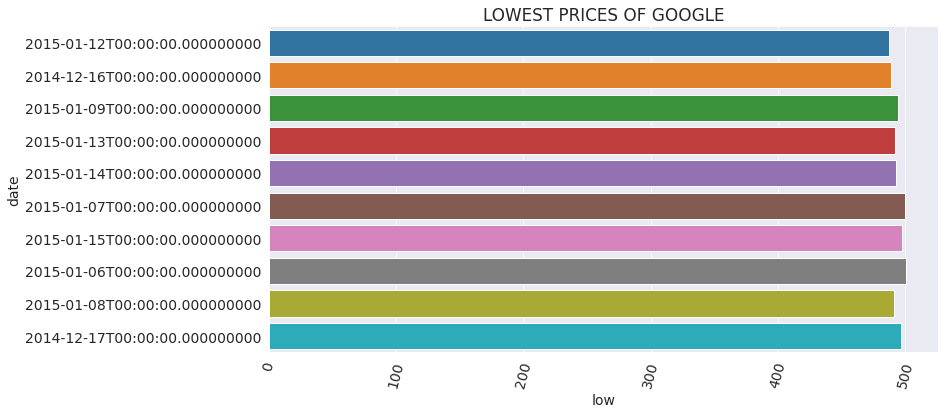

In [59]:
plt.figure(figsize=(12,6))
plt.title('LOWEST PRICES OF GOOGLE')
sns.barplot(x='low',y='date',data=y)# PLOTTING A BAR GRAPH
plt.xticks(rotation=75);

In [60]:
print('GOOGLE STOCKS FACED THE FINANCIAL CRISES AT {}'.format(sp_google['date'][200]))

GOOGLE STOCKS FACED THE FINANCIAL CRISES AT 2015-01-12 00:00:00


### GRAPH ANALYSIS :

* THIS GRAPH SHOWS US THE LOWER PRICES OF STOCKS WERE AT THE YEAR BETWEEN THE 2015 TO 2010 .
* AND THE LOWEST PRICE WAS 487.5 AT 2015-01-12 . 

### EXPLANATION :

* STEP-1 HERE WE USED A FUNCTION CALLED '.sort_values' TO SHORT LIST OUT THE TOP 10 ALL TIME LOW VALUES
* STEP-2 WE PLOTTED A BAR GRAPH FOR THE SORTED DATA FOR OUR VISUAL.
* STEP-3 WITH THE HELP OF THE SORTED VALUE WE CONFORM THE DATE OF FINANCIAL CRISES FOR GOOGLE STOCKS.

### CONCLUSION :
* WE CONCLUDED THAT THE ALL TIME LOW VALUE OF GOOGLE STOCKS WAS AT 2015-01-12 .
* GOOGLE PERFORMANCE WAS AFFECTED BY VARIOUS FACTORS, INCLUDING CHANGES IN THE TECHNOLOGY INDUSTRY, SHIFTS IN CONSUMER BEHAVIOR AND MACROECONOMIC TRENDS


## What Could Be The Volatility  Of The Market For The  Daily Returns Of Apple Stock ?

In [71]:
sp_apple

,date,open,high,low,close,volume,Name,Intra day profit,TREND
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,UP TREND
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,UP TREND
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,DOWN TREND
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,DOWN TREND
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,UP TREND
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.6150,UP TREND
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-5.5000,DOWN TREND
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-2.6100,DOWN TREND
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,8.2000,UP TREND


In [82]:
type(sp_apple)

pandas.core.frame.DataFrame

In [91]:
# converting "pandas.core.frame.DataFrame" Data Type TO "numpy.ndarray"

closing_prices_of_apple = (sp_apple.close).values
print(closing_prices_of_apple)

[ 67.8542  68.5614  66.8428 ... 156.49   163.03   159.54  ]


In [85]:
type(closing_prices_of_apple) 

numpy.ndarray

In [89]:
# Calculate the daily returns

daily_returns = np.diff(closing_prices_of_apple) / closing_prices_of_apple[:-1]


In [90]:
# Calculate the daily return volatility (standard deviation of daily returns)

daily_return_volatility = np.std(daily_returns)

In [78]:
print("Daily Return Volatility for APPLE Stock:", daily_return_volatility)

Daily Return Volatility for APPLE Stock: 0.014587211012196448


### EXPLANATION :
* First we converted  "pandas.core.frame.DataFrame" Data Type TO "numpy.ndarray" using '.values' .
* Then We Calculated The Volatility Using NUMPY Library "np.std" Function Which is used to calculate the standard deviation of apple stocks, which is a measure of how much the values in the array vary from the mean (average).


##  SUMMARIZATION :


* In this project, we analyzed a real-world dataset of STOCK PRICES BETWEEN 2014-2018 . We started by performing data preparation and cleaning, which involved checking for missing, incorrect, and invalid data, and handling them appropriately.

* We then moved on to exploratory analysis and visualization, where we computed INTRA DAY PROFITS, explored distributions of OPEN PRICE vs CLOSED PRICE  using histograms, and explored the relationship between 'open', 'high', 'low', 'close', 'volume'  using bar charts,pie chart. We answered several interesting questions about the dataset using Pandas and Matplotlib.

* Some of the key insights we gained from our analysis include:

* TRENDS OF EACH MARKETS FOR EVERY SINGLE DAY.
* INTRADAY PROFITS FOR EACH MARKETS .
* VISUALIZING THE 4 YEARS ACHIEVEMENTS IN A TIME LINE GRAPH FOR EACH MARKET.
  * WE USED HISTOGRAMS TO PLOT THE OPENING AND CLOSING VALUES OF EACH STOCKS.
  * WE USED PIE CHART TO DESCRIBE THE TOTAL PERCENTAGES OWN BY THEIR RESPECTIVE STOCKS.
  * WE USED LINE GRAPH TO DESCRIBE THE TIME LINE OF RESPECTIVE STOCKS.

* These Analysis might be valuable for the trader to visualize the history of the leading top multinational corporation stocks.



## CONCLUSION / INFERENCE :
* From the years 2014 to 2018, the stocks of Amazon, Apple, Microsoft, and Google experienced significant growth and demonstrated their position as leading tech companies in the stock market.

* During this period, Amazon's stock showed remarkable performance, with its price increasing more than fourfold. The company capitalized on its expanding e-commerce business, successful ventures into cloud computing with Amazon Web Services (AWS), and investments in innovative technologies like voice-activated smart devices (Amazon Echo) and streaming services (Amazon Prime Video). This strong growth trajectory positioned Amazon as a dominant player in the global retail and tech sectors.

* Apple's stock also demonstrated steady growth during this period. The company benefited from the success of its flagship products, such as the iPhone and iPad, as well as the introduction of new product categories like the Apple Watch. Apple's stock price more than doubled, reflecting investors' confidence in the company's ability to consistently innovate and generate significant revenue.

* Microsoft experienced a notable transformation during this timeframe. Under the leadership of CEO Satya Nadella, the company shifted its focus towards cloud computing and software services. This strategic pivot paid off, as Microsoft's stock price more than tripled. The success of its Azure cloud platform, Office 365 subscription model, and acquisition of LinkedIn contributed to its impressive growth, solidifying Microsoft's position as a technology powerhouse.

* Similarly, Google (now Alphabet Inc.) witnessed substantial growth in its stock value. The company's dominance in the search engine market, along with successful forays into mobile technology with the Android operating system and digital advertising, fueled its success. Additionally, Google's investments in emerging technologies like artificial intelligence and self-driving cars showcased its commitment to innovation. Over the period from 2014 to 2018, Google's stock price nearly doubled, reflecting investors' optimism about its diverse revenue streams and its potential for continued growth.

* In conclusion, from 2014 to 2018, the stocks of Amazon, Apple, Microsoft, and Google experienced impressive growth, driven by their technological advancements, strategic acquisitions, and successful product launches. These companies demonstrated their ability to adapt to changing market trends, innovate consistently, and generate substantial returns for their investors.

### References

* https://matplotlib.org/ - FOR VISUALIZATION

* https://pandas.pydata.org/ - TO EXPLORE THE LIBRARY FUNCTIONS

* https://stackoverflow.com/ - FOR CODING 

* https://www.kaggle.com/ - FOR DATA FRAMES

### Datasets Source
* kaggle - https://www.kaggle.com/datasets/darshanprabhu09/stock-prices-for